In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
%matplotlib inline

# Data analysis of StackOverflow Developer Survey: 
# A Comparison Of West and East Europe

# Abstract
&nbsp;&nbsp;&nbsp;&nbsp;In this visualisation we will proceed to analise the data from StackOverflow Developer Survey from 2021 and to extract information about the difference of compensation, gender, ocupation, gender distribution, education level and employment status, in countries from the West and East side of Europe, in order to understand the magnitute of the difference in the lives of Computer Science enthusiats in these two areas.

# Introduction
&nbsp;&nbsp;&nbsp;&nbsp;The **reason** why we chose to consider this project is to discover and surface out any disscriminations, unfairness or difference in how the people involved in Computer Science topics are treated in multi-national organizations, or even countries which are spread across the EU. If we succeed to extract out of the raw data these differences we can bring them up in our socity and try to address them with our peers in order to improve how people are treated, remove social or work frustrations and only focus on discovery, creating meaningful solutions that improve the world and leave aside petty road-blocks that might affect these.

### Source
&nbsp;&nbsp;&nbsp;&nbsp;The **source** visualization* that insipired the presnted one, is the StackOverFlow 2021 Developer Survey. This survey's visualisation aims to track the evolution of the Stack Overflow users, with regard to their yearly status of tech stack, compensation, education level, enployment status and other relevant information.

### Original visualization
&nbsp;&nbsp;&nbsp;&nbsp;The limitations of that presented visualisation was that it presented a lot of plots that were numerical based, so a lot of bar charts were used, from which the difference between certain areas was quite difficult to understand and extract. So, in order to improve upon that, we restricted the data to countries only based in EU and then clustered the data based on the West or East area of Europe. Also, in order to see the difference in the lives of the respondants, we have restrained of answering to questions with regard to what technology they hate or love, or would like to learn.

### Questions
&nbsp;&nbsp;&nbsp;&nbsp;Further, this visualization aims to answer five different **questions**:
- What is the difference in compensation?
- What is the gender distribution in both areas?
- What is the main occupation in each country of both areas?
- What is the most common education level in each country of both areas?
- What is the employment status distribution in both areas?

### Data
&nbsp;&nbsp;&nbsp;&nbsp;The dataset use is made publicly available by the StackOverflow organization. Before setting on the previously described goal, we have taken some time to analyze this dataset and its schema. Along with the actual data, which is in a tabular format, came the schema and the description of the data, which was very extensive. The used columns in this analysis were: **Contry, DevType, Currency, CompFreq, CompTotal, EdLevel, Gender, Empolyment**. We have observed that most of this data is text based, so we needed to adapt our visualizations for this kind of data.

&nbsp;&nbsp;&nbsp;&nbsp;

In [121]:
fullDF = pd.read_csv('survey_results_public.csv', dtype= {
                     'CompTotal': float
                 })
print(fullDF.groupby(["Country"]).size())

euE = ["Romania", "Ukraine", "Poland", "Hungary", "Slovenia","Slovakia","Bulgaria", "Montenegro", "Estonia", "Lithuania", "Greece", "The former Yugoslav Republic of Macedonia", "Serbia", "Bosnia and Herzegovina", "Belarus", "Republic of Moldova"]
euW = ["Austria", "France", "Spain", "Protugal", "Germany", "Netherlands", "Belgium", "Italy", "Belgium", "Denmark "]

Country
Afghanistan                              65
Albania                                  73
Algeria                                  46
Andorra                                  12
Angola                                   27
                                       ... 
Venezuela, Bolivarian Republic of...    104
Viet Nam                                386
Yemen                                    20
Zambia                                   22
Zimbabwe                                 36
Length: 181, dtype: int64


In [122]:
eastDF = fullDF[fullDF["Country"].isin(euE)]
westDF = fullDF[fullDF["Country"].isin(euW)]
print(eastDF.to_string)

<bound method DataFrame.to_string of        ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
32             33                     I am a developer by profession   
34             35                     I am a developer by profession   
48             49                     I am a developer by profession   
50             51                     I am a developer by profession   
...           ...                                                ...   
83324       83325                     I am a developer by profession   
83325       83326             I am a student who is learning to code   
83327       83328                     I am a developer by profession   
83383       83384             I am a student who is learning to code   
83403       83404  I used to be a developer by profession, but no...   

                                              Employment   Country US_State  \
0      Independent 

### What is the difference in compensation: Process

&nbsp;&nbsp;&nbsp;&nbsp;As for the first idea, this was an obvious bar chart with the mean as the average in each country.

&nbsp;&nbsp;&nbsp;&nbsp;The problem here was that this data was related to three columns: Currency, Frequency of payment(hourly, montly and yearly) and the actual CompTotal. So given the fact that we would like the amounts to be uniform, we have decided to choose only the Euro currency based on montly frequency. But, by removing all the other frequencies and currencies, we might have missed to have a batter clarity and view upon the difference of the areas.

&nbsp;&nbsp;&nbsp;&nbsp;As an alternative, we could have used a library that would convert currencies, but that would have been too tedious and not the in scope.

&nbsp;&nbsp;&nbsp;&nbsp;Also, an alternative to the visualization would have been a box plot in which we could have understand better the distribution of the amount over the number of respondants.


array([<AxesSubplot:title={'center':'Eu West'}, xlabel='Country', ylabel='mean(EUR)'>],
      dtype=object)

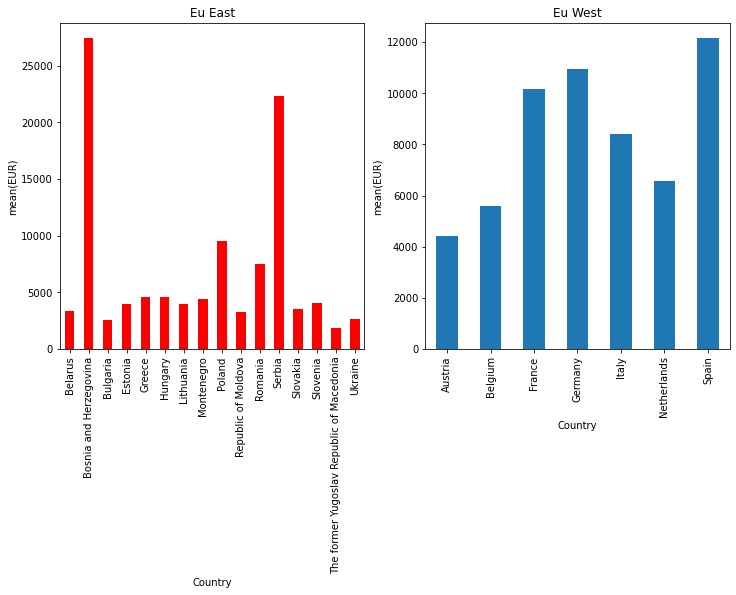

In [123]:
#initally I only grouped by country and got the mean, then figured out that there were different currencies and frequencies of each type, so to be robust i chose euro
#I observed that for Bosnia and Serbia the values where enormous, so I thought that the na values would ruin the mean, but after cleaning, the result was the same, so the data seems erronous for those points

plotSalaryE = eastDF.where(eastDF["Currency"].str.contains("EUR",na=False) & eastDF["CompFreq"].str.contains('Monthly',na=False) & eastDF["CompTotal"].notna()).groupby('Country')['CompTotal'].mean()
plotSalaryW = westDF.where(westDF["Currency"].str.contains("EUR",na=False) & westDF["CompFreq"].str.contains('Monthly',na=False) & westDF["CompTotal"].notna()).groupby('Country')['CompTotal'].mean()

#use subpluts in order to have them displayed side by side in a grid
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6))
#set labels, colors and titles for better understanding, left the country names horizontal on purpose so they won't overlap since they are long
plotSalaryE.plot(ax = axes[0], ylabel="mean(EUR)",color="red", kind='bar', label="Eu East",subplots=True)
plotSalaryW.plot(ax = axes[1],ylabel="mean(EUR)" , kind='bar', label="Eu West",subplots=True)

### What is the gender distribution in both areas: Process

&nbsp;&nbsp;&nbsp;&nbsp;Fristly this was chosen to be a bar chart, but after seeing that the difference in the counts were too big, we have switched to a piechart approach in order to have a nicer emphasis on each categorie's percent.

&nbsp;&nbsp;&nbsp;&nbsp;The problem here was that there were too many responses types which would be either a combiation of the first four most common ones, or something that was very scarce found in the data. So as a solution to this we thought of combining those answers into a "Other" category but we decided on avoiding that by taking the top 4 most common resonses.

<AxesSubplot:title={'center':'West Gender Dist'}>

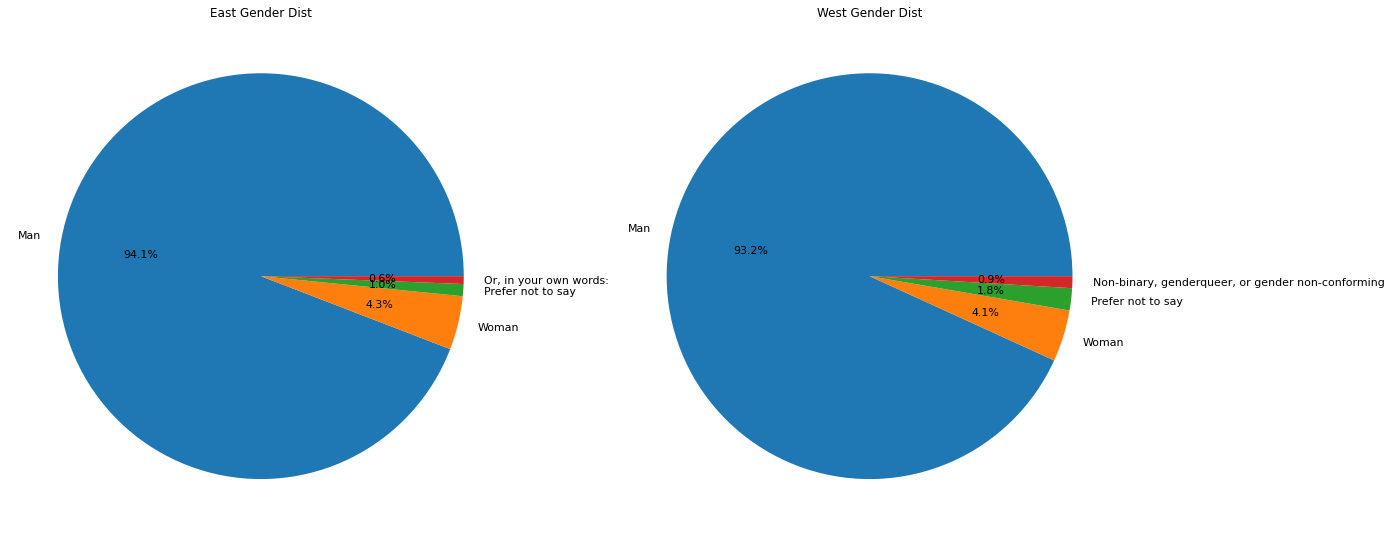

In [124]:
def func(pct):
  return "{:1.1f}%".format(pct)

#first tried some weird unnecessary stuff
# s = eastDF.Gender
# counts = s.value_counts()
# percent = s.value_counts(normalize=True)
# percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
# pd.DataFrame({'counts': counts, 'per100': percent100}).head(4).plot(y='counts', kind="pie", autopct=lambda pct: func(pct),legend = "", fontsize=20)

#simplified, also shocked by the percents
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.set_title("East Gender Dist")
ax2.set_title("West Gender Dist")
eastDF["Gender"].value_counts().head(4).plot(ax = ax1, kind="pie", ylabel="", autopct=lambda pct: func(pct),legend = "", fontsize=11,figsize=(20,20))
westDF["Gender"].value_counts().head(4).plot(ax = ax2, kind="pie", ylabel="", autopct=lambda pct: func(pct),legend = "", fontsize=11,figsize=(20,20))


### What is the main occupation in each country of both areas: Process

&nbsp;&nbsp;&nbsp;&nbsp;At the beggining this was just a groupby devtype and country, which resulted in a text table from which there could not be extracted many visualizations. But after a bit of thinking, we saw that we have the Country column, and we could use a map visualization in order to show the most common occupation the respondants have based on their country and the area they are based in.

&nbsp;&nbsp;&nbsp;&nbsp;So, having this goal in mind, we have researched on how we could build a map visualization from a list of country names. We have stubmled over geopandas, a python library which provides the pandas functionality but for map visualization.

&nbsp;&nbsp;&nbsp;&nbsp;In order to create the maps from the country names, we have to load the world map, filter it based on the countries we have found in the data, and clip the world map to match only the countries in europe, so we would have a focus over the EU, by using a custom polygon figure.

&nbsp;&nbsp;&nbsp;&nbsp;Next, we needed to add label annotations for each country with the data we found as the most common occupation in said country. In order to do that, we have to sort both dataframes, being the map one and the occupations ones, based on the keys, being the countries, in order to match the same occupation for the countries. Then, we have extracted the occupation from the first dataframe and added them as a column to the matched contries in the second dataframe.

&nbsp;&nbsp;&nbsp;&nbsp;The problem here that in order to achieve this goal we have to make some tedious and hard transformations and cleaning over the data, which we are not positive that it was worth given that the difference were not that big in the result

c:\Users\Rares\anaconda3\envs\my_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\Rares\AppData\Local\Temp\ipykernel_17584\774275135.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(europeEast.centroid.x, europeEast.centroid.y, europeEast.ocupation):
c:\Users\Rares\anaconda3\envs\my_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Text(0.5, 1.0, 'West Most Common occupation per Country')

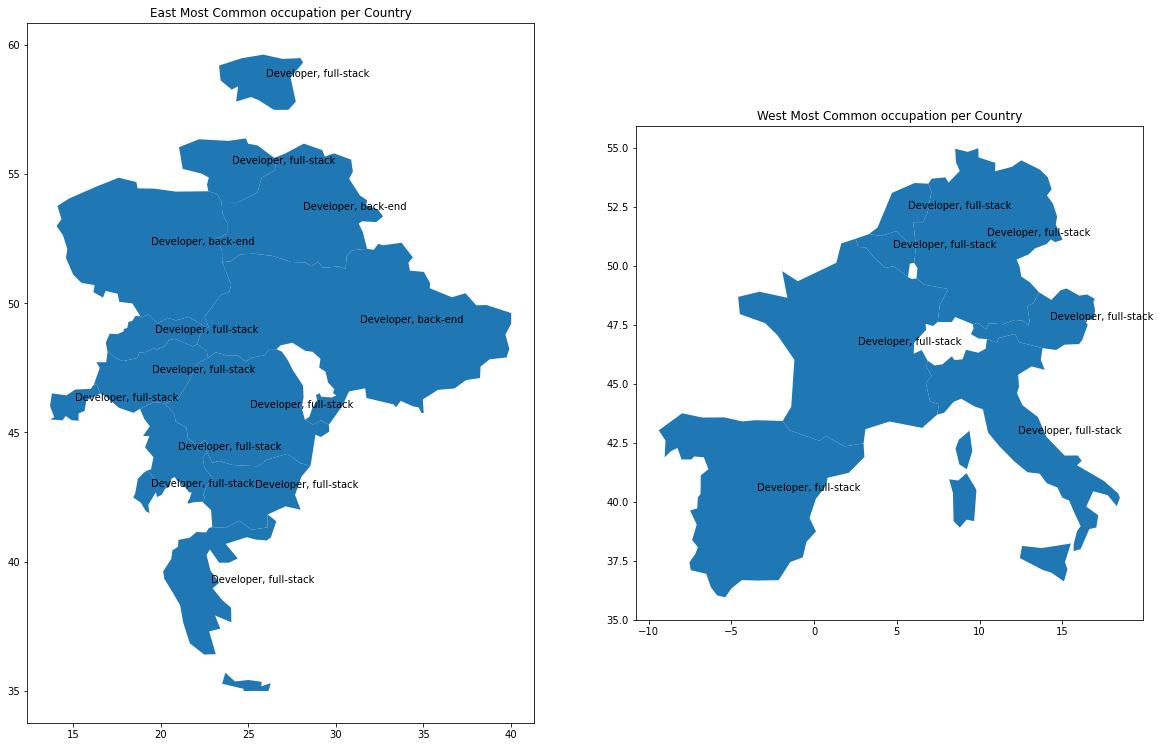

In [125]:
commonOcupationEast = eastDF.groupby("Country")[["DevType","Country"]].agg(pd.Series.mode)

countriesE = commonOcupationEast.Country.to_list()
typesE = commonOcupationEast.DevType.to_list()
bothE = dict(zip(countriesE, typesE))

commonOcupationWest = westDF.groupby("Country")[["DevType","Country"]].agg(pd.Series.mode)
sortedOcupationE=sorted(bothE.values(), key=lambda x:x.lower())[:13]

countriesW = commonOcupationWest.Country.to_list()
typesW = commonOcupationWest.DevType.to_list()
bothW = dict(zip(countriesW, typesW))

sortedOcupationW=sorted(bothW.values(), key=lambda x:x.lower())[:7]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

europe=world[world.continent=="Europe"]

polygon = Polygon([(-25,35), (40,35), (40,75),(-25,75)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
europe=gpd.clip(europe, polygon)

europeEast=europe[europe.name.isin(euE)]
europeEast.sort_values(by='name', ascending=True)
europeEast["ocupation"] = sortedOcupationE

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,20))

europeEast.plot(ax = ax1, figsize=(15,15))

for x, y, label in zip(europeEast.centroid.x, europeEast.centroid.y, europeEast.ocupation):
    ax1.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color="black")

europeW=europe[europe.name.isin(euW)]
europeW.sort_values(by='name', ascending=True)
europeW["ocupation"] = sortedOcupationW
europeW.plot(ax=ax2, figsize=(15,15))

for x, y, label in zip(europeW.centroid.x, europeW.centroid.y, europeW.ocupation):
    ax2.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color="black")

ax1.set_title("East Most Common occupation per Country")
ax2.set_title("West Most Common occupation per Country")



###  What is the most common education level in each country of both areas: Process

&nbsp;&nbsp;&nbsp;&nbsp;This was almost identical to the last visualization, the only differnce was that we have to work with the EdLevel column, and the match with the countries had to be different

&nbsp;&nbsp;&nbsp;&nbsp;Also, the same problems occur, but this time we can see some difference in the results

c:\Users\Rares\anaconda3\envs\my_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\Rares\AppData\Local\Temp\ipykernel_17584\980609945.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(europeEast.centroid.x, europeEast.centroid.y, europeEast.ocupation):
c:\Users\Rares\anaconda3\envs\my_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Text(0.5, 1.0, 'West Most Common Education Level per Country')

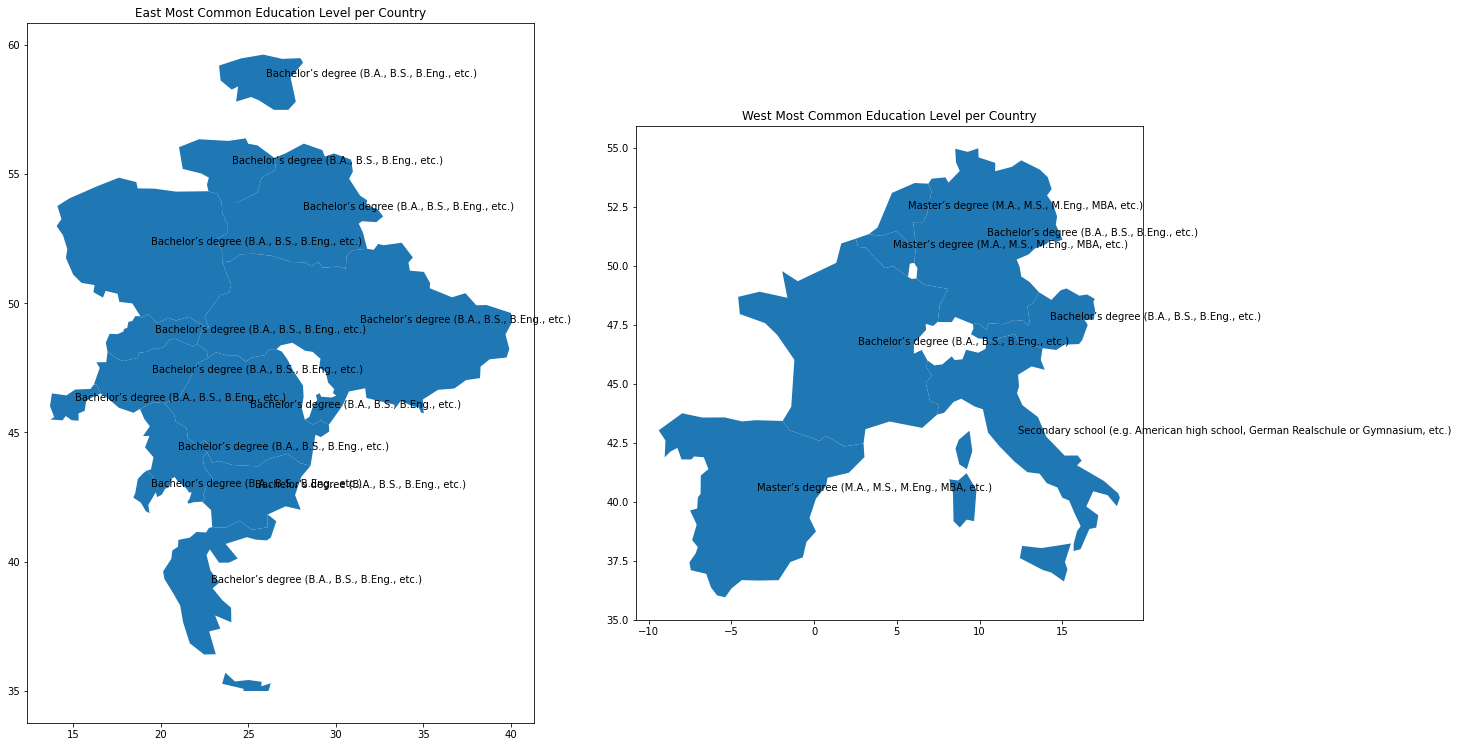

In [126]:
commonEdEast = eastDF.groupby("Country")[["EdLevel","Country"]].agg(pd.Series.mode).explode("EdLevel").drop_duplicates(subset='Country', keep="first")

countriesE = commonEdEast.Country.to_list()
typesE = commonEdEast.EdLevel.to_list()
bothE = dict(zip(countriesE, typesE))

commonEdWest = westDF.groupby("Country")[["EdLevel","Country"]].agg(pd.Series.mode)
sortedOcupationE=sorted(bothE.values(), key=lambda x:x.lower())[:13]

countriesW = commonEdWest.Country.to_list()
typesW = commonEdWest.EdLevel.to_list()
bothW = dict(zip(countriesW, typesW))

sortedOcupationW=sorted(bothW.values(), key=lambda x:x.lower())[:7]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

europe=world[world.continent=="Europe"]

polygon = Polygon([(-25,35), (40,35), (40,75),(-25,75)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
europe=gpd.clip(europe, polygon)

europeEast=europe[europe.name.isin(euE)]
europeEast.sort_values(by='name', ascending=True)
europeEast["ocupation"] = sortedOcupationE

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,20))

europeEast.plot(ax = ax1, figsize=(15,15))

for x, y, label in zip(europeEast.centroid.x, europeEast.centroid.y, europeEast.ocupation):
    ax1.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color="black")

europeW=europe[europe.name.isin(euW)]
europeW.sort_values(by='name', ascending=True)
europeW["ocupation"] = sortedOcupationW
europeW.plot(ax=ax2, figsize=(15,15))

for x, y, label in zip(europeW.centroid.x, europeW.centroid.y, europeW.ocupation):
    ax2.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color="black")

ax1.set_title("East Most Common Education Level per Country")
ax2.set_title("West Most Common Education Level per Country")




###  What is the employment status distribution in both areas

&nbsp;&nbsp;&nbsp;&nbsp;Initially, we wanted to find out how many of the respondants who are students also work in both areas in order th see if the life of the students is more afordable in a place vs the other, or if the education they are pursuing offers them enough practical experience that the do not need to work while pursuing their studies.

&nbsp;&nbsp;&nbsp;&nbsp;The problem here was that the distribution of students was too low in order to have a realisting understanding of this issue, so we switched to simply displaying the distribution of empoylemnt in this case

<AxesSubplot:title={'center':'West Employment Working Dist'}>

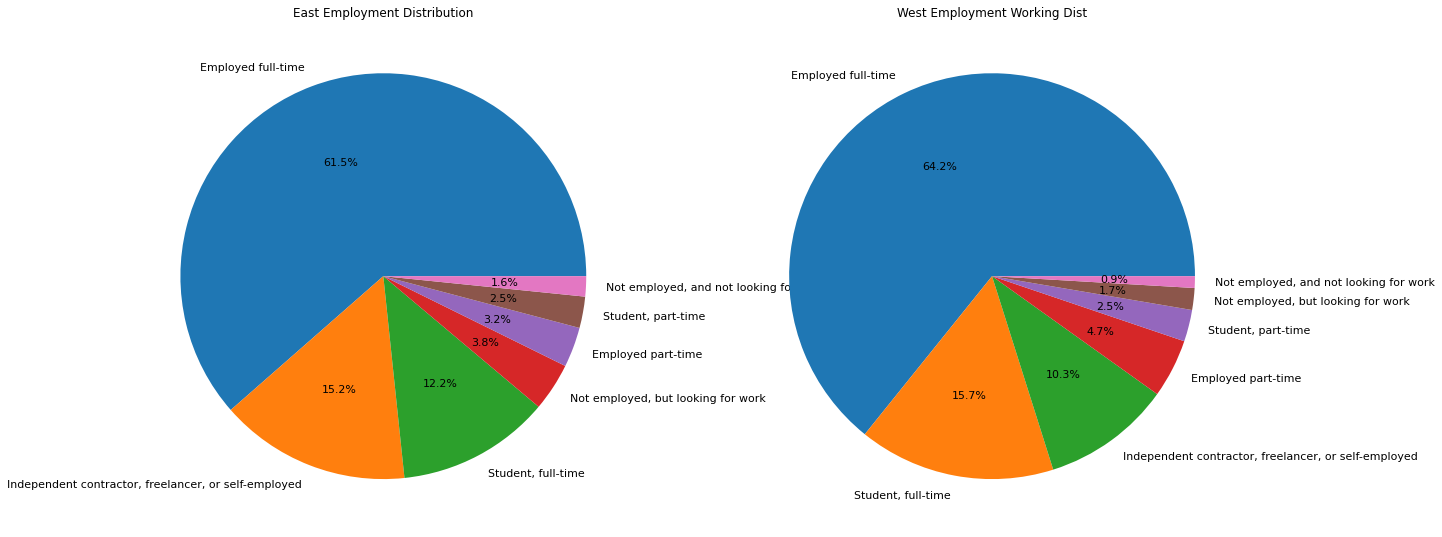

In [127]:

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.set_title("East Employment Distribution")
ax2.set_title("West Employment Working Dist")
eastDF["Employment"].value_counts().head(7).plot(ax = ax1, kind="pie", ylabel="", autopct=lambda pct: func(pct),legend = "", fontsize=11,figsize=(20,20))
westDF["Employment"].value_counts().head(7).plot(ax = ax2, kind="pie", ylabel="", autopct=lambda pct: func(pct),legend = "", fontsize=11,figsize=(20,20))

# Conclusion

### What is the difference in compensation?
&nbsp;&nbsp;&nbsp;&nbsp; As a conclusion for this question, we can see that indeed, the compensation the Western countries in higher than in Eastern countries, but this might be due to the fact that in Eastern countries, the Euro currency is not the national one. A problem that this visualization presents is that since the records with national currencies of the East countries were not used, or converted, we might not get the full grasp of this comparison. Also there appears to be incorrect data (i.e. Spain, Bosnia, Serbia)

### What is the gender distribution in both areas?
&nbsp;&nbsp;&nbsp;&nbsp; The fact that in both areas the percentage of the "Man"  was over 90% was quite a shock. Maybe this dataset is not really the best choice for such a comparison, nevertheless quite a difference. What we also observed is that in the top 4, the West area had the "non-binary" category, whereas, the east provided the "other". We might conclude that the West area is more open with Gender neutrality than the East one, even in the CompSci.

### What is the main occupation in each country of both areas?
&nbsp;&nbsp;&nbsp;&nbsp; This visualization did not provide that much of an insight as information, it only seems the that most common occupation in both areas is full-stack developer. Interestingly enough is the fact that the front-end developer is not found as the most common in any countries.

### What is the most common education level in each country of both areas?
&nbsp;&nbsp;&nbsp;&nbsp; Here we can actually see a difference between the zones. All of the east countries have as most common education level the Bachelor's degree, whereas the West focus more on their higher education and also pursue the Master. The anomaly here is Italy, where we can see that most of the respondants are self thought developers who did not follow a higher education.

### What is the employment status distribution in both areas?
&nbsp;&nbsp;&nbsp;&nbsp; This visualization shows that in both areas the distributions with regard to the Employment status are quite equal.

### Thoughts
&nbsp;&nbsp;&nbsp;&nbsp; As conclusions, we can see some differences in the education, compensation in both areas. But also we can observe some similarities too.

### References
&nbsp;&nbsp;&nbsp;&nbsp;[2021 Developer Survey StackOverflow](https://insights.stackoverflow.com/survey/2021)

&nbsp;&nbsp;&nbsp;&nbsp;[Survey Analysis By Janio Martinez Bachmann](https://www.kaggle.com/code/janiobachmann/survey-analysis-a-stackoverflow-story)

&nbsp;&nbsp;&nbsp;&nbsp;[Geoplotting](https://towardsdatascience.com/geoplotting-emissions-intensity-of-electricity-generation-in-europe-90c22b378858)

&nbsp;&nbsp;&nbsp;&nbsp;[2021 Developer Survey StackOverflow Raw Data](https://insights.stackoverflow.com/survey)

&nbsp;&nbsp;&nbsp;&nbsp;[Obviously, StackOverflow](https://stackoverflow.com)